# Basic Brownian simulation and video synthesis in Notebook (with new VideoPlayer)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from ddm_toolkit import DDMParams
from ddm_toolkit.workflows import simul1_make_simulated_image_stack
from ddm_toolkit.workflows import simul1_save_simulation_result_file

Running inside a Notebook (Jupyter or otherwise)...


In [3]:
from ddm_toolkit.notebook_utils import notebook_video_jshtml
from IPython.display import HTML

## Brownian simulation and generation of video stack

This is functionally identical to `simul1_simulate_sythesize.py`. It runs the same code, but the simulation/synthesis parameters are defined inside the Notebook.

In [4]:
params = DDMParams() # this generates an empty parameter object
#TODO: (re)document the parameters (descriptions can be found inside the ddm_toolkit.parameters module, need to be converted into MarkDown document)
params.sim_Np = 100
params.sim_bl = 200.
params.sim_Nt = 500
params.sim_T = 1000.
params.sim_D = 0.4
params.sim_img_border = 16.0
params.sim_img_w = 2.0
params.sim_img_Npx = 256
params.sim_img_I_offset = 0.06
params.sim_img_I_noise = 0.003
params.update_simulation_parameters()

In [5]:
ims = simul1_make_simulated_image_stack(params)

  0%|          | 0/500 [00:00<?, ?it/s]

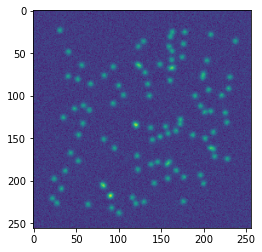

In [6]:
# output a single frame
plt.imshow(ims[0])

We save the simulation result (together with the parameters used) to an NPZ file for later use in the `simulNB2` Notebook.

In [7]:
fpn = 'datafiles/simulNB_simulation_result.npz'
simul1_save_simulation_result_file(fpn, ims, params)

Writing NPZ file with video and simulation parameters...


## In-Notebook videoplayer

In `ddm_toolkit.notebook_utils` we have code that generates a JS-HTML code string for displaying a video inside a Notebook.

Thus, we need two cells of code: first generate the JS-HTML video code, second output this as pure HTML via the HTML function.

In the first cell, we use the `%%capture` magic command to suppress spurious image output from the video generation, while preserving standard output and error messages.

In [8]:
%%capture --no-stderr --no-stdout
jshtml_animation = notebook_video_jshtml(ims, Nframes = 50)

Time needed for generating 50 frame JS animation: 2.90s


In [9]:
HTML(jshtml_animation)